In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
# Paso 1: Preprocesamiento de datos (ejemplo básico)
#Supongamos que tenemos la siguiente serie de tiempo prueba

time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15])
print("time_series: ", time_series)
train_size = int(0.6 * len(time_series)) # Tamaño del entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data:  [10 11 12 13 14 15]


In [ ]:
# Paso 2: Preparación de datos (ejemplo)
# Transformación de los datos de la secuencia
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Se definen los pasos de tiempo para la serie temporal
seq_length = 4

# Creación del entrenamiento y prueba en 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

# Se imprimen los conjuntos en 3D
print("X_train: ", X_train)
print("y_train: ", y_train)
print("X_test: ", X_test)
print("y_test: ", y_test)

X_train:  [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
y_train:  [5 6 7 8 9]
X_test:  [[10 11 12 13]
 [11 12 13 14]]
y_test:  [14 15]


In [ ]:
# Paso 3: Construcción del modelo
model = Sequential()
model.add(SimpleRNN(units=16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

# Paso 4: Compilación y entrenamiento del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.6160e-04
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.5621e-04
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.5086e-04
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.4555e-04
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.4029e-04
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.3505e-04
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.2986e-04
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.2470e-04
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.1957e-04
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.1447e-04
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.0944e-04
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.0443e-04
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.9947e-04
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5.9452e-04
Epoch 15/200
1/1 ━━━━━━━━━━━━

<Axes: >

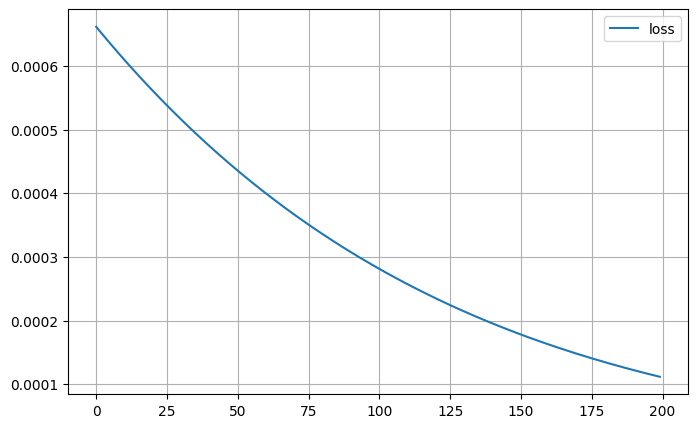

In [ ]:
# Paso 5: Entrenamiento
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# Paso 6: Gráfico del historial de entrenamiento:
pd.DataFrame(history.history).plot(figsize=(8, 5))